## Doing the csv manipulation for January meteorological data

### Convert observation minute data to hourly data

In [1]:
import pandas as pd
import numpy as np

In [2]:
dfmin = pd.read_csv('./data/met_data_jan_minute.csv')

FileNotFoundError: [Errno 2] No such file or directory: './data/met_data_jan_minute.csv'

In [110]:
dfmin.head()

NameError: name 'dfmin' is not defined

In [57]:
dfmin.shape

(43058, 8)

In [58]:
dfmin['datetime'] = pd.to_datetime(dfmin.time)

In [59]:
dfmin.head()

,time,obs_temp,obs_ws,obs_wd,obs_swupper,obs_swlower,obs_lwupper,obs_lwlower,datetime
0,1/1/2021 0:00:00,9.791667,0.499167,189.9167,0.329,3.376,581.2,586.0,2021-01-01 00:00:00
1,1/1/2021 0:01:00,9.700000,0.464167,190.5000,0.632,3.087,580.8,585.5,2021-01-01 00:01:00
2,1/1/2021 0:02:00,9.700000,0.323333,215.1667,0.287,3.543,581.7,586.1,2021-01-01 00:02:00
3,1/1/2021 0:03:00,9.700000,0.380000,228.1667,-0.471,3.446,582.4,586.7,2021-01-01 00:03:00
4,1/1/2021 0:04:00,9.650000,0.341667,268.2500,-0.971,3.662,583.0,587.3,2021-01-01 00:04:00


In [60]:
# In this data set dates are missing, from index 17828(+2 in excel file) to 17830(+2 in excel file)

dfmin[dfmin['datetime'].isna()]

,time,obs_temp,obs_ws,obs_wd,obs_swupper,obs_swlower,obs_lwupper,obs_lwlower,datetime
17828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
17829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
17830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [61]:
# drop the nan rows

dfmin = dfmin.dropna()
dfmin.isna().sum()

time           0
obs_temp       0
obs_ws         0
obs_wd         0
obs_swupper    0
obs_swlower    0
obs_lwupper    0
obs_lwlower    0
datetime       0
dtype: int64

In [ ]:
# Now we have to add the misssing datetime indices and replace those dates as NaN

import pandas as pd

idx = pd.date_range('2020-01-01 0:00:00', '09-30-2013')

s = pd.Series({'09-02-2013': 2,
               '09-03-2013': 10,
               '09-06-2013': 5,
               '09-07-2013': 1})
s.index = pd.DatetimeIndex(s.index)

s = s.reindex(idx, fill_value=0)
print(s)

In [62]:
dfmin.shape

(43055, 9)

In [63]:
dfmin = dfmin.set_index(dfmin.datetime)
dfmin = dfmin.drop(['datetime', 'time'], axis=1)

In [64]:
dfmin.head()

,obs_temp,obs_ws,obs_wd,obs_swupper,obs_swlower,obs_lwupper,obs_lwlower
datetime,,,,,,,
2021-01-01 00:00:00,9.791667,0.499167,189.9167,0.329,3.376,581.2,586.0
2021-01-01 00:01:00,9.700000,0.464167,190.5000,0.632,3.087,580.8,585.5
2021-01-01 00:02:00,9.700000,0.323333,215.1667,0.287,3.543,581.7,586.1
2021-01-01 00:03:00,9.700000,0.380000,228.1667,-0.471,3.446,582.4,586.7
2021-01-01 00:04:00,9.650000,0.341667,268.2500,-0.971,3.662,583.0,587.3


In [65]:
dfmin.shape

(43055, 7)

In [66]:
# Now we fill the missing datetime indices and replace the correspoding column values with NaN

idx = pd.date_range('2021-01-01 00:00:00', '2021-02-01 00:00:00', freq='T')
dfmin = dfmin.reindex(idx, fill_value=np.nan)

In [67]:
dfmin.shape

(44641, 7)

In [69]:
dfmin.isna().sum()

obs_temp       1586
obs_ws         1586
obs_wd         1586
obs_swupper    1586
obs_swlower    1586
obs_lwupper    1586
obs_lwlower    1586
dtype: int64

In [76]:
dfmin[dfmin['obs_lwlower'].isna()]

,obs_temp,obs_ws,obs_wd,obs_swupper,obs_swlower,obs_lwupper,obs_lwlower
2021-01-01 13:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05 01:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05 01:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-08 21:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-08 21:06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-01-31 08:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-31 08:25:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-31 08:26:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-31 08:27:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
dfhour = dfmin.resample('H').mean()

In [86]:
dfhour.head()

,obs_temp,obs_ws,obs_wd,obs_swupper,obs_swlower,obs_lwupper,obs_lwlower
2021-01-01 00:00:00,9.083194,0.388056,194.790280,-0.766233,4.249833,592.228333,596.831667
2021-01-01 01:00:00,8.532500,0.807958,255.143060,-0.770333,4.229100,600.483333,603.240000
2021-01-01 02:00:00,7.817083,0.342125,233.011115,-0.729000,3.971767,610.816667,613.328333
2021-01-01 03:00:00,7.068889,0.308444,186.411113,-0.998017,3.775050,613.565000,616.086667
2021-01-01 04:00:00,6.664722,1.179944,80.036110,-1.327167,3.472017,613.920000,616.143333


In [87]:
dfhour = dfhour.iloc[:-1,:]

In [88]:
dfhour

,obs_temp,obs_ws,obs_wd,obs_swupper,obs_swlower,obs_lwupper,obs_lwlower
2021-01-01 00:00:00,9.083194,0.388056,194.790280,-0.766233,4.249833,592.228333,596.831667
2021-01-01 01:00:00,8.532500,0.807958,255.143060,-0.770333,4.229100,600.483333,603.240000
2021-01-01 02:00:00,7.817083,0.342125,233.011115,-0.729000,3.971767,610.816667,613.328333
2021-01-01 03:00:00,7.068889,0.308444,186.411113,-0.998017,3.775050,613.565000,616.086667
2021-01-01 04:00:00,6.664722,1.179944,80.036110,-1.327167,3.472017,613.920000,616.143333
...,...,...,...,...,...,...,...
2021-01-31 19:00:00,17.421111,2.058167,85.134722,-1.033400,4.862667,472.975000,506.001667
2021-01-31 20:00:00,16.214306,1.512486,113.995834,-0.149967,4.749167,488.085000,517.606667
2021-01-31 21:00:00,15.645695,1.202667,117.656945,-0.170533,4.702117,495.301667,523.960000
2021-01-31 22:00:00,14.962778,1.133694,115.691674,-0.593033,4.516250,498.720000,528.283333


In [90]:
dfhour.to_csv('./data/met_data_jan_hour.csv')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

# Use seaborn style defaults and set default figure size
sns.set_style("whitegrid")

In [2]:
dfmod = pd.read_csv('data/aqi_data_mod.csv')
dfobs = pd.read_csv('data/aqi_data_obs.csv')

In [3]:
dfmod['datetime'] = pd.to_datetime(dfmod.date) + pd.to_timedelta(dfmod.hour)
dfobs['datetime'] = pd.to_datetime(dfobs.date) + pd.to_timedelta(dfobs.hour)

In [4]:
dfmod = dfmod.drop(['date', 'hour'], axis=1)
dfobs = dfobs.drop(['date', 'hour'], axis=1)

In [5]:
dfmod = dfmod.set_index(dfmod.datetime)
dfobs = dfobs.set_index(dfobs.datetime)

In [6]:
# Do interpolatoin of the observed data

dfobs = dfobs.interpolate(method = 'time')

In [7]:
import sys
sys.path.append('../functions/')

In [8]:
print(sys.path)

['/home/aditya/Documents/python_projs/srfp/delhi', '/home/aditya/anaconda3/lib/python38.zip', '/home/aditya/anaconda3/lib/python3.8', '/home/aditya/anaconda3/lib/python3.8/lib-dynload', '', '/home/aditya/anaconda3/lib/python3.8/site-packages', '/home/aditya/anaconda3/lib/python3.8/site-packages/locket-0.2.1-py3.8.egg', '/home/aditya/anaconda3/lib/python3.8/site-packages/IPython/extensions', '/home/aditya/.ipython', '../functions/']


In [11]:
import dplot

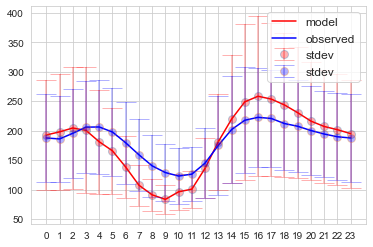

In [12]:
dplot.plot(dfmod, dfobs, 'mod_PM2.5', 'obs_PM2.5', mod_stdev='mod_PM2.5_stdev', obs_stdev='obs_PM2.5_stdev')

In [14]:
dfmod.head(25)

,mod_PM2.5,mod_PM2.5_stdev,mod_PM10,mod_PM10_stdev,datetime,time
datetime,,,,,,
2020-11-01 00:00:00,152.61,51.64,241.71,105.98,2020-11-01 00:00:00,00:00:00
2020-11-01 01:00:00,159.82,53.31,254.49,111.38,2020-11-01 01:00:00,01:00:00
2020-11-01 02:00:00,160.04,51.57,252.47,109.05,2020-11-01 02:00:00,02:00:00
2020-11-01 03:00:00,156.73,40.47,242.03,87.21,2020-11-01 03:00:00,03:00:00
2020-11-01 04:00:00,156.32,41.95,232.03,84.02,2020-11-01 04:00:00,04:00:00
2020-11-01 05:00:00,157.04,44.11,231.33,85.67,2020-11-01 05:00:00,05:00:00
2020-11-01 06:00:00,141.07,36.02,203.85,68.86,2020-11-01 06:00:00,06:00:00
2020-11-01 07:00:00,100.28,23.66,139.01,43.47,2020-11-01 07:00:00,07:00:00
2020-11-01 08:00:00,70.95,13.78,97.52,25.65,2020-11-01 08:00:00,08:00:00
